# 02-homework

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"

# open dataset
df = pd.read_csv(data_url)

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

Preparing the dataset
Use only the following columns:

'engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg'
EDA
Look at the fuel_efficiency_mpg variable. Does it have a long tail?

In [3]:
df_data = df[['engine_displacement',
               'horsepower',
               'vehicle_weight',
               'model_year',
               'fuel_efficiency_mpg']]

In [4]:
df_data.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


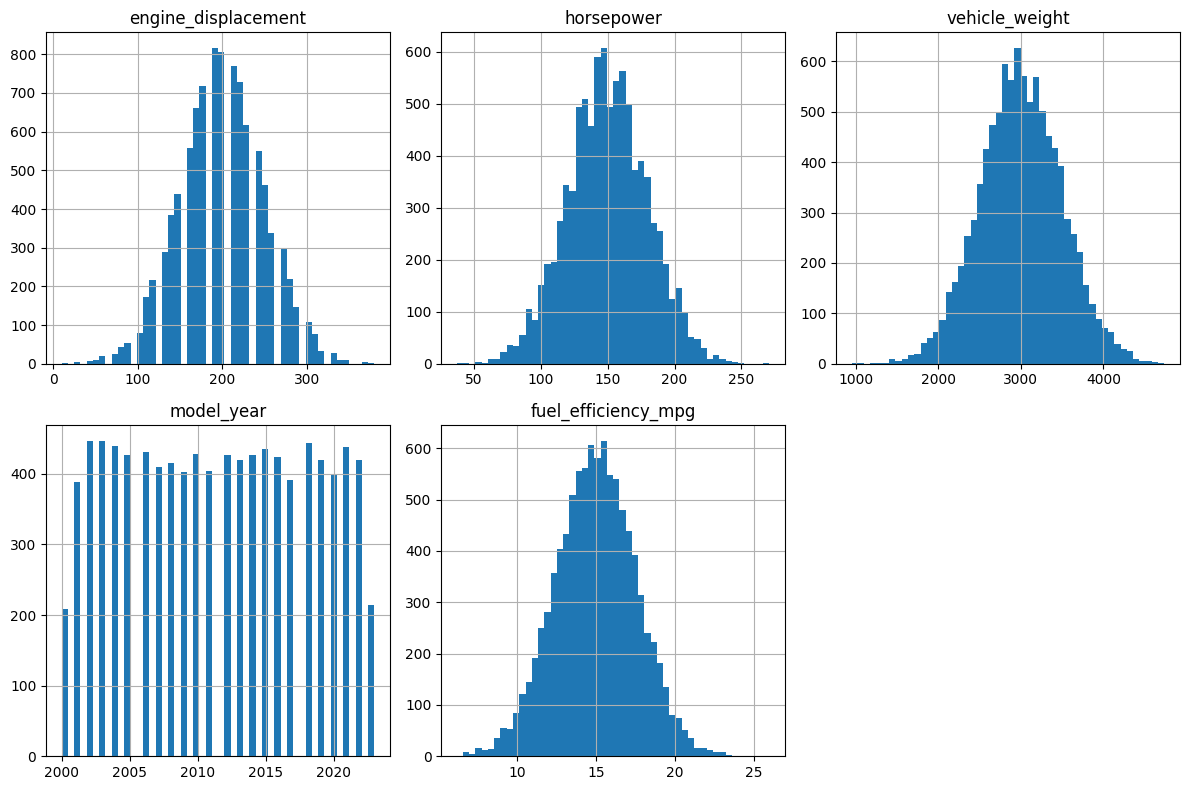

In [5]:
df_data.hist(bins=50, figsize=(12, 8), layout=(2, 3))
plt.tight_layout()
plt.show()



The histogram is not tail, it's like symetrical bell curve

# Question 1
There's one column with missing values. What is it?

'engine_displacement'
'horsepower'
'vehicle_weight'
'model_year'

In [6]:
df_data.isna().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

Column horsepower have null value

# Question 2
What's the median (50% percentile) for variable 'horsepower'?

49
99
149
199
Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use the same code as in the lectures

In [7]:
horsepower_median = df_data['horsepower'].median()

horsepower_median

149.0

# Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.

Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [8]:
n = len(df_data)

print(f"Number of rows: {n}")

Number of rows: 9704


In [9]:
# create an array with indices from 0 to n-1
idx = np.arange(n)

# set seed 42 and shuffle idx
np.random.seed(2)
np.random.shuffle(idx)

print(idx)

[ 246 8125 1927 ... 6637 2575 7336]


In [10]:
# split train, val, test = 60%, 20%, 20%
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

print(n_train, n_val, n_test)

5824 1940 1940


In [11]:
# create train, val, test dataframes
# train = 0 - n_train
df_train = df_data.iloc[idx[:n_train]]
# val = n_train - n_train+n_val
df_val = df_data.iloc[idx[n_train:n_train+n_val]]
# test = n_train+n_val - n
df_test = df_data.iloc[idx[n_train+n_val:]]

# reset index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [12]:
# show sample of train data
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,164.0,2990.040917,2019,15.963019
1,170,NaN,2729.623741,2012,15.931964
2,200,142.0,3126.513375,2019,14.284901
3,200,148.0,3136.477901,2003,14.865210
4,230,141.0,3384.681613,2006,12.428822


In [13]:
# show sample of val data
df_val.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,260,138.0,3843.156212,2019,10.238328
1,210,130.0,2643.471845,2022,16.641570
2,210,143.0,3329.858078,2014,12.864171
3,170,191.0,3749.611122,2005,12.258436
4,140,164.0,2981.107371,2013,15.101802


In [14]:
# show sample of test data
df_test.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,210,153.0,4009.703618,2001,10.073835
1,200,125.0,3116.568770,2018,14.786988
2,150,221.0,2797.684088,2003,16.344033
3,190,141.0,3548.910770,2009,12.500575
4,200,169.0,3492.542080,2020,13.426546


In [15]:
# split data to X and y

y_train = df_train['fuel_efficiency_mpg'].values
X_train = df_train.drop('fuel_efficiency_mpg', axis=1)

y_val = df_val['fuel_efficiency_mpg'].values
X_val = df_val.drop('fuel_efficiency_mpg', axis=1)

y_test = df_test['fuel_efficiency_mpg'].values
X_test = df_test.drop('fuel_efficiency_mpg', axis=1)


In [16]:
X_val.isna().sum()

engine_displacement      0
horsepower             134
vehicle_weight           0
model_year               0
dtype: int64

# Question 3
We need to deal with missing values for the column from Q1.

We have two options: fill it with 0 or with the mean of this variable.

Try both options. For each, train a linear regression model without regularization using the code from the lessons.

For computing the mean, use the training only!

Use the validation dataset to evaluate the models and compare the RMSE of each option.

Round the RMSE scores to 2 decimal digits using round(score, 2)

Which option gives better RMSE?

Options:

* With 0

* With mean

* Both are equally good

In [17]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    #print(X)
    #print('')

    XTX = X.T.dot(X)
    #print(XTX)
    #print('')
    XTX_inv = np.linalg.inv(XTX)
    #print(XTX_inv)
    #print('')
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [18]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

## Option 1: fill horsepower na with 0

In [19]:
# fill horsepower na with 0

X_train_opt1 = X_train.copy()
X_train_opt1['horsepower'] = X_train_opt1['horsepower'].fillna(0)

X_val_opt1 = X_val.copy()
X_val_opt1['horsepower'] = X_val_opt1['horsepower'].fillna(0)

X_test_opt1 = X_test.copy()
X_test_opt1['horsepower'] = X_test_opt1['horsepower'].fillna(0)


In [20]:
# train 

r_opt1 = train_linear_regression(X_train_opt1, y_train)

print(r_opt1)

w0_opt1, w_opt1 = r_opt1[0], r_opt1[1]


(25.904357611918527, array([ 0.0001526 ,  0.00378541, -0.00500641,  0.00176812]))


In [21]:
# do val
y_val_pred_opt1 = w0_opt1 + X_val_opt1.dot(w_opt1)
print(y_val_pred_opt1)

0       10.795840
1       16.769341
2       13.368076
3       11.426304
4       15.181108
          ...    
1935    18.235831
1936    15.834373
1937    17.293212
1938    13.200382
1939    12.278974
Length: 1940, dtype: float64


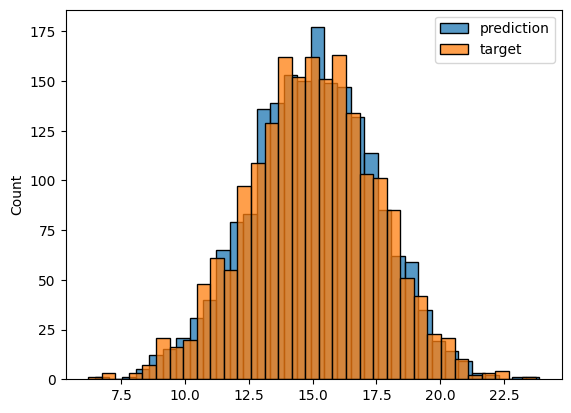

In [28]:
sns.histplot(y_val_pred_opt1, label='prediction')
sns.histplot(y_val, label='target')
plt.legend()

In [23]:
# calculate RMSE
rmse_val_opt1 = rmse(y_val, y_val_pred_opt1).round(2)

print("With 0, rmse : ", rmse_val_opt1)

With 0, rmse :  0.52


## Option 2: fill horsepower na with mean

In [24]:
# fill horsepower na with mean

horsepower_mean = X_train['horsepower'].mean()

X_train_opt2 = X_train.copy()
X_train_opt2['horsepower'] = X_train_opt2['horsepower'].fillna(horsepower_mean)

X_val_opt2 = X_val.copy()
X_val_opt2['horsepower'] = X_val_opt2['horsepower'].fillna(horsepower_mean)

X_test_opt2 = X_test.copy()
X_test_opt2['horsepower'] = X_test_opt2['horsepower'].fillna(horsepower_mean)

In [25]:
# train 

r_opt2 = train_linear_regression(X_train_opt2, y_train)

print(r_opt2)

w0_opt2, w_opt2 = r_opt2[0], r_opt2[1]


(25.83295396935493, array([ 0.00020173,  0.01045072, -0.0050125 ,  0.00129226]))


In [26]:
# do val
y_val_pred_opt2 = w0_opt2 + X_val_opt2.dot(w_opt2)
print(y_val_pred_opt2)

0       10.672857
1       16.596459
2       13.281469
3       11.659392
4       15.233634
          ...    
1935    18.201814
1936    15.715050
1937    16.956461
1938    13.032206
1939    12.319075
Length: 1940, dtype: float64


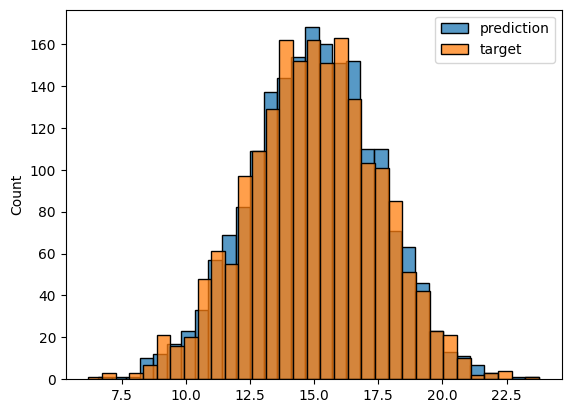

In [27]:
sns.histplot(y_val_pred_opt2, label='prediction')
sns.histplot(y_val, label='target')
plt.legend()

In [57]:
# calculate RMSE
rmse_val_opt2 = rmse(y_val, y_val_pred_opt2).round(2)

print("With mean, rmse : ", rmse_val_opt2)

With mean, rmse :  0.47


It's better using mean as imputation. It give rmse 0.47, better than 0.52

# Question 4

Now let's train a regularized linear regression.

For this question, fill the NAs with 0.

Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].

Use RMSE to evaluate the model on the validation dataset.

Round the RMSE scores to 2 decimal digits.

Which r gives the best RMSE?

If there are multiple options, select the smallest r.

Options:

* 0

* 0.01

* 1

* 10

* 100

In [58]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [59]:
# fill horsepower na with 0

X_train_opt1 = X_train.copy()
X_train_opt1['horsepower'] = X_train_opt1['horsepower'].fillna(0)

X_val_opt1 = X_val.copy()
X_val_opt1['horsepower'] = X_val_opt1['horsepower'].fillna(0)

X_test_opt1 = X_test.copy()
X_test_opt1['horsepower'] = X_test_opt1['horsepower'].fillna(0)


In [60]:
reg = [0, 0.01, 0.1, 1, 5, 10, 100]

In [61]:
list_rmse = []

for r in reg:
    w0, w = train_linear_regression_reg(X_train_opt1, y_train, r)
    y_val_pred = w0 + X_val_opt1.dot(w)
    rmse_val = rmse(y_val, y_val_pred).round(2)
    list_rmse.append(rmse_val)

print(list_rmse)

    

[0.52, 0.52, 0.53, 0.53, 0.53, 0.53, 0.53]


The best rmse is r = 0

# Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.

Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

For each seed, do the train/validation/test split with 60%/20%/20% distribution.

Fill the missing values with 0 and train a model without regularization.

For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

What's the standard deviation of all the scores? To compute the standard deviation, use np.std.

Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

* 0.001

* 0.006

* 0.060

* 0.600

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [62]:
seed_array = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

rmse_list = []

for seed in seed_array:
    # create an array with indices from 0 to n-1
    idx = np.arange(n)

    # set seed and shuffle idx
    np.random.seed(seed)
    np.random.shuffle(idx)

    # split train, val, test = 60%, 20%, 20%
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    # create train, val, test dataframes
    # train = 0 - n_train
    df_train = df_data.iloc[idx[:n_train]]
    # val = n_train - n_train+n_val
    df_val = df_data.iloc[idx[n_train:n_train+n_val]]
    # test = n_train+n_val - n
    df_test = df_data.iloc[idx[n_train+n_val:]]
    #print(df_train.head(5))

    # reset index
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    # split data to X and y
    y_train = df_train['fuel_efficiency_mpg'].values
    X_train = df_train.drop('fuel_efficiency_mpg', axis=1)

    y_val = df_val['fuel_efficiency_mpg'].values
    X_val = df_val.drop('fuel_efficiency_mpg', axis=1)

    y_test = df_test['fuel_efficiency_mpg'].values
    X_test = df_test.drop('fuel_efficiency_mpg', axis=1)


    X_train_opt1 = X_train.copy()
    X_train_opt1['horsepower'] = X_train_opt1['horsepower'].fillna(0)

    X_val_opt1 = X_val.copy()
    X_val_opt1['horsepower'] = X_val_opt1['horsepower'].fillna(0)

    X_test_opt1 = X_test.copy()
    X_test_opt1['horsepower'] = X_test_opt1['horsepower'].fillna(0)

    r_opt1 = train_linear_regression(X_train_opt1, y_train)

    #print(r_opt1)

    w0_opt1, w_opt1 = r_opt1[0], r_opt1[1]

    # do val
    y_val_pred_opt1 = w0_opt1 + X_val_opt1.dot(w_opt1)

    # calculate RMSE
    rmse_val_opt1 = rmse(y_val, y_val_pred_opt1).round(3)

    rmse_list.append(rmse_val_opt1)


In [63]:
rmse_list

[0.521, 0.521, 0.523, 0.516, 0.511, 0.528, 0.531, 0.509, 0.515, 0.513]

In [64]:
std_rmse = np.std(rmse_list).round(4)

print("std rmse : ", std_rmse)

std rmse :  0.0069


Because the target and features are approximately normally distributed, changing the random seed did not have a big impact on the splits.

In my experiments with 10 different seeds, the standard deviation of the validation RMSE was only about 0.007, indicating that the effect of the random seed on model performance is very small for this dataset and model.

However, for other datasets, especially those that are smaller, imbalanced, or have skewed distributions, changing the seed can have a larger impact.

Therefore, the conclusion that "changing the seed doesn’t have a big impact” is specific to this dataset and model and cannot be generalized.

# Question 6
Split the dataset like previously, use seed 9.

Combine train and validation datasets.

Fill the missing values with 0 and train a model with r=0.001.

What's the RMSE on the test dataset?

Options:

* 0.15
* 0.515
* 5.15
* 51.5

In [65]:
seed = 9

# create an array with indices from 0 to n-1
idx = np.arange(n)

# set seed and shuffle idx
np.random.seed(seed)
np.random.shuffle(idx)

# split train, test = 80%, 20%
#n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_test

# create train, test dataframes
# train = 0 - n_train
df_train = df_data.iloc[idx[:n_train]]
# test = n_train+n_val - n
df_test = df_data.iloc[idx[n_train:]]
#print(df_train.head(5))

# reset index
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# split data to X and y
y_train = df_train['fuel_efficiency_mpg'].values
X_train = df_train.drop('fuel_efficiency_mpg', axis=1)

y_test = df_test['fuel_efficiency_mpg'].values
X_test = df_test.drop('fuel_efficiency_mpg', axis=1)


X_train_opt1 = X_train.copy()
X_train_opt1['horsepower'] = X_train_opt1['horsepower'].fillna(0)

X_test_opt1 = X_test.copy()
X_test_opt1['horsepower'] = X_test_opt1['horsepower'].fillna(0)

r_opt1 = train_linear_regression_reg(X_train_opt1, y_train, 0.001)

#print(r_opt1)

w0_opt1, w_opt1 = r_opt1[0], r_opt1[1]

# do test
y_test_pred_opt1 = w0_opt1 + X_test_opt1.dot(w_opt1)

# calculate RMSE
rmse_test_opt1 = rmse(y_test, y_test_pred_opt1).round(3)

print("rmse : ", rmse_test_opt1)


rmse :  0.516


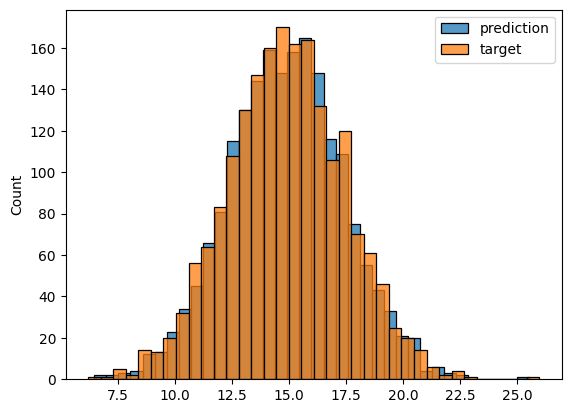

In [66]:
sns.histplot(y_test_pred_opt1, label='prediction')
sns.histplot(y_test, label='target')
plt.legend()

In this case, the model trained on more data (60%+20%). And by adding regularization 0.001, the RMSE is 0.516.

The RMSE closer to previously do with val data.

It can be conclude no overfitting and no mismatch data between train and validation data.

The model generalize well.

